In [0]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import os
import tensorflow as tf
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import re 
from tensorflow.python.platform import gfile
from PIL import Image
import pickle
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [0]:
#using grid images
model_dir = 'Upwork/Thesis/graph'
images_dir = 'Upwork/Thesis/Grid_images/CN_grid/'
images_dir1 = 'Upwork/Thesis/Grid_images/AD_grid/'
list_CN = [images_dir+f for f in os.listdir(images_dir ) if re.search('PNG|png', f)]
list_AD = [images_dir1+f for f in os.listdir(images_dir1 ) if re.search('PNG|png', f)]

In [0]:
list_img = list_CN + list_AD
len(list_img)


685

In [0]:
def create_graph():
    with tf.compat.v2.io.gfile.GFile(os.path.join(model_dir, 'classify_image_graph_def.pb'), 'rb')  as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

In [0]:
def extract_features_keras(image_path):
    base_model = InceptionV3(include_top=False, pooling = 'avg',weights='imagenet',input_shape=(474,570,3))
    pred = []
    for imge in image_path:
        #print(imge)
        img = image.load_img(imge)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        predictions = base_model.predict(x)
        pred.append(np.squeeze(predictions))
        
    return pred

In [0]:
features= extract_features_tf(list_img)

685
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/CN_grid/merge_top94.png...
Instructions for updating:
Use tf.gfile.GFile.
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/CN_grid/merge_top315.png...
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/CN_grid/merge_top231.png...
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/CN_grid/merge_top141.png...
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/AD_grid/merge_top1282.png...
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/AD_grid/merge_top1188.png...
Processing gdrive/My Drive/Personal/Upwork/Thesis/Grid_images/AD_grid/merge_top1085.png...


In [0]:
features.shape

(685, 2048)

In [0]:
import csv
import numpy as np
fil_name = 'Upwork/Thesis/file'

In [0]:
with open(fil_name+'.csv', 'r') as f:
  reader = csv.reader(f)
  examples = list(reader)

print(len(examples))

685


In [0]:
features= np.asarray(examples)

In [0]:
b_f = extract_features_keras(list_img)

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
len(b_f)

685

In [0]:
#placeholder array
labels= np.zeros(len(b_f))
#we know that the sick brains come after the normal ones since we just concatenated the health with the sick brains
labels[346:685] = 1

In [0]:
pickle.dump(features, open('features', 'wb'))
pickle.dump(labels, open('labels', 'wb'))


In [0]:
import sklearn
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.svm import SVC, LinearSVC

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(pca_result, labels, test_size=0.2, random_state=42)


In [0]:
clf = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2',multi_class='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

In [0]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    sens = TP / (TP + FN) 
    spec = TN / (FP + TN)
    print ("Sensitivity: ", sens, "Specificity:", spec)

In [0]:


print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))
perf_measure(y_test,y_pred)
#plot_confusion_matrix(y_test,y_pred)



Accuracy: 82.5%
Sensitivity:  0.7857142857142857 Specificity: 0.8518518518518519


In [0]:
from sklearn.svm import SVC, LinearSVC

from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
#from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


clf = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
clf.score(X_test, y_test)



0.8321167883211679

In [0]:
k_fold = KFold(n_splits=10, shuffle=False, random_state=0)
C_array=[0.001,0.01,0.1,1,10]
C_scores=[]

for k in C_array:
    clf = svm.SVC(kernel='linear', C=k)
    scores= cross_val_score(clf, features, labels, cv=k_fold, n_jobs=-1)
    C_scores.append(scores.mean())
    print (C_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.62346547314578]
[0.62346547314578, 0.7498721227621484]
[0.62346547314578, 0.7498721227621484, 0.7836530264279625]
[0.62346547314578, 0.7498721227621484, 0.7836530264279625, 0.7692455242966753]
[0.62346547314578, 0.7498721227621484, 0.7836530264279625, 0.7692455242966753, 0.7678388746803069]


In [0]:
clf = svm.SVC(kernel='linear', C=0.1,probability=True)

# final_model = clf.fit(features, labels)

final_model = CalibratedClassifierCV(clf,cv=10,method='sigmoid')
final_model = clf.fit(X_train, y_train)

In [0]:
y_pred = final_model.predict(X_test)

In [0]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))
perf_measure(y_test,y_pred)
#plot_confusion_matrix(y_test,y_pred)

Accuracy: 83.2%
Sensitivity:  0.7857142857142857 Specificity: 0.8641975308641975


In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [0]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

#We make class predictions (predict) as well as predicted probabilities (predict_proba) 
#to calculate the ROC AUC. Once we have the testing predictions, we can calculate the ROC AUC.

In [0]:
roc_value = roc_auc_score(y_test, rf_probs)

In [0]:
print(roc_value)

0.8488756613756613


In [0]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,rf_predictions)*100))
#plot_confusion_matrix(y_test,rf_predictions)
perf_measure(y_test,rf_predictions)

Accuracy: 78.1%
Sensitivity:  0.7321428571428571 Specificity: 0.8148148148148148


In [0]:
scores = cross_val_score(model, features, labels, scoring='accuracy', cv=5)
print (scores)
print (scores.mean())

[0.81751825 0.81751825 0.74452555 0.77372263 0.80291971]
0.7912408759124088


In [0]:
X=features
y=labels

In [0]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]


In [0]:
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (685, 2050)


In [0]:
df.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel2010,pixel2011,pixel2012,pixel2013,pixel2014,pixel2015,pixel2016,pixel2017,pixel2018,pixel2019,pixel2020,pixel2021,pixel2022,pixel2023,pixel2024,pixel2025,pixel2026,pixel2027,pixel2028,pixel2029,pixel2030,pixel2031,pixel2032,pixel2033,pixel2034,pixel2035,pixel2036,pixel2037,pixel2038,pixel2039,pixel2040,pixel2041,pixel2042,pixel2043,pixel2044,pixel2045,pixel2046,pixel2047,y,label
680,0.13029217720031738,0.38012704253196716,0.10417989641427994,0.00081603042781353,0.6295675039291382,0.07377561181783676,0.007616037502884865,0.09130896627902985,0.06295149028301239,0.9949361085891724,0.5976492166519165,0.003655241336673498,0.13754427433013916,0.06815265119075775,0.0028009028173983097,0.8964239358901978,0.8006377220153809,1.2926491498947144,0.3116607069969177,0.0,0.7569049596786499,0.0,0.28374722599983215,0.023452002555131912,0.29123613238334656,0.981689453125,0.3476446568965912,0.1405753195285797,0.5173289775848389,0.11592546850442886,0.02989763580262661,0.006477909628301859,0.0012266198173165321,0.032392650842666626,0.5363435745239258,0.019127458333969116,0.012010475620627403,0.15329989790916443,0.1015659049153328,0.34128817915916443,...,0.0,0.0010117257479578257,2.723064422607422,0.07522965222597122,0.003162289736792445,0.00876146275550127,0.0,0.8690295219421387,0.353441059589386,0.0,0.5811586380004883,0.20109891891479492,0.0,0.5733514428138733,0.3340674340724945,0.44377657771110535,0.565383791923523,0.0,0.0,0.027436256408691406,0.0005786912515759468,0.27020302414894104,0.12107331305742264,0.6850168704986572,0.29175618290901184,0.5292326211929321,0.2843162417411804,0.07461259514093399,0.15052388608455658,0.08854300528764725,1.0050445795059204,0.015482615679502487,0.5242640972137451,0.6812980771064758,0.022535350173711777,0.1920728087425232,0.00960045401006937,0.0,1.0,1.0
681,0.03320083022117615,0.1774926483631134,0.04437755420804024,0.06581815332174301,0.275516152381897,0.054323069751262665,0.07636614888906479,0.6427435278892517,0.022118698805570602,0.873490571975708,0.3085891306400299,0.019571341574192047,0.2127293199300766,0.0765804648399353,0.0,0.008047430776059628,0.2250172346830368,0.9147706031799316,0.9013442993164062,0.0,0.7571485638618469,0.0,0.723039448261261,0.10680762678384781,0.0,0.5028533935546875,0.32829713821411133,0.505333423614502,1.4127535820007324,0.16814091801643372,0.04112556576728821,0.07223635911941528,0.0,0.17794114351272583,0.46003106236457825,0.36674249172210693,0.04677925631403923,0.11522340774536133,0.12435263395309448,0.6304077506065369,...,0.09478799998760223,0.0009638594929128885,1.895402193069458,0.0021858459804207087,0.09950531274080276,0.0013378788717091084,0.0,0.9902787804603577,0.1957954317331314,0.04354267194867134,0.783486008644104,0.4555732309818268,0.028141260147094727,0.7210550308227539,0.1730877161026001,0.7630132436752319,0.4770634174346924,0.0,0.3074566721916199,0.2221643328666687,0.0,0.08363136649131775,0.00017262720211874694,0.5888969898223877,0.29933270812034607,0.08917257934808731,0.19261468946933746,0.07813133299350739,0.07767059653997421,0.03496327996253967,1.3895680904388428,0.0018153924029320478,0.4454953968524933,0.6247520446777344,0.0605500191450119,0.22964893281459808,0.0538075715303421,0.007979944348335266,1.0,1.0
682,0.09787868708372116,0.36448007822036743,0.047201406210660934,0.0,0.4612904191017151,0.16540318727493286,0.013877649791538715,0.6456864476203918,0.12568502128124237,1.0246505737304688,0.4459947943687439,0.03249357268214226,0.18162523210048676,0.2147999107837677,0.00259672524407506,0.43377721309661865,0.5906067490577698,1.156614065170288,0.49810296297073364,0.0,0.6589487791061401,0.0,0.3643195927143097,0.026240741834044456,0.05626819282770157,1.1266

In [0]:
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.26288446 0.15442932 0.07422848 0.05778359 0.05113285 0.03646491
 0.03009186 0.02508694 0.02118371 0.01875395 0.0169109  0.01479944
 0.01291055 0.01042563 0.00994339 0.00903545 0.00784815 0.00736435
 0.00654255 0.00614049 0.00570557 0.00535153 0.00483195 0.00460153
 0.0044977  0.00395112 0.00385538 0.00355368 0.00352822 0.0031818
 0.00313361 0.00281511 0.00270797 0.00260294 0.00252503 0.00232597
 0.00229204 0.00221934 0.00214809 0.00201688]


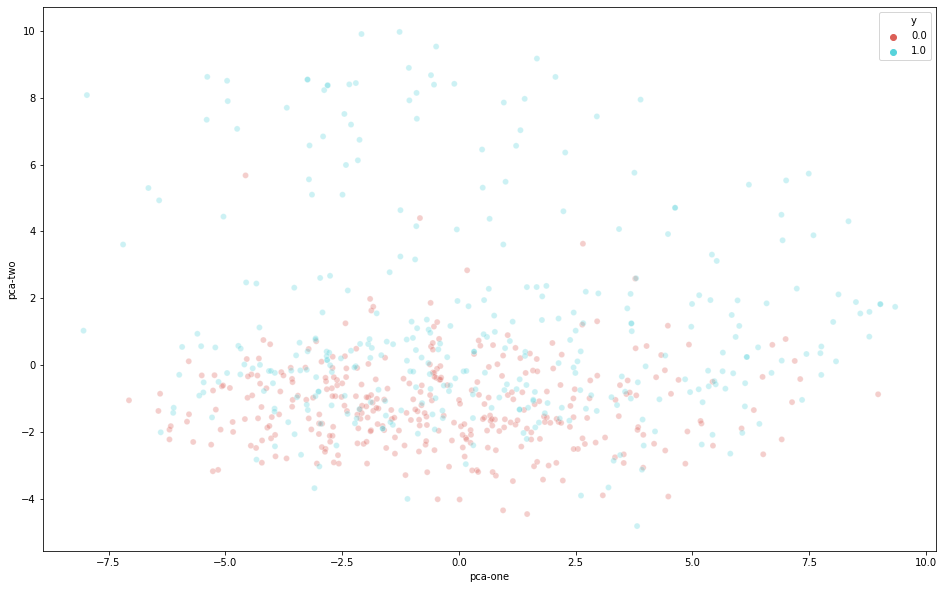

In [0]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df.loc[:,:],
    legend="full",
    alpha=0.3
)

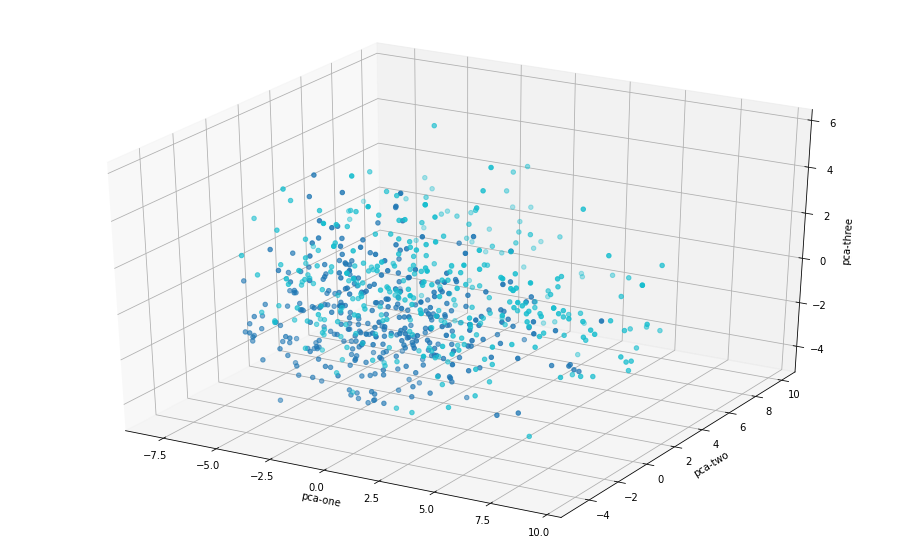

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[:,:]["pca-one"], 
    ys=df.loc[:,:]["pca-two"], 
    zs=df.loc[:,:]["pca-three"], 
    c=df.loc[:,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [0]:
N = 10000
df_subset = df.loc[:,:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.26288446 0.15442932 0.07422848 0.05778359 0.05113285 0.03646491
 0.03009186 0.02508694 0.02118371 0.01875395 0.0169109  0.01479944
 0.01291055 0.01042563 0.00994339 0.00903545 0.00784815 0.00736435
 0.00654255 0.00614049 0.00570557 0.00535153 0.00483195 0.00460153
 0.0044977  0.00395112 0.00385538 0.00355368 0.00352822 0.0031818
 0.00313361 0.00281511 0.00270797 0.00260294 0.00252503 0.00232597
 0.00229204 0.00221934 0.00214809 0.00201688]


In [0]:
pca_result.shape

(685, 40)

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 685 samples in 0.092s...
[t-SNE] Computed neighbors for 685 samples in 1.802s...
[t-SNE] Computed conditional probabilities for sample 685 / 685
[t-SNE] Mean sigma: 2.194795
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.378204
[t-SNE] KL divergence after 500 iterations: 1.153171
t-SNE done! Time elapsed: 4.511460781097412 seconds


In [0]:
tsne_results[1]

array([-5.199396, 15.460725], dtype=float32)

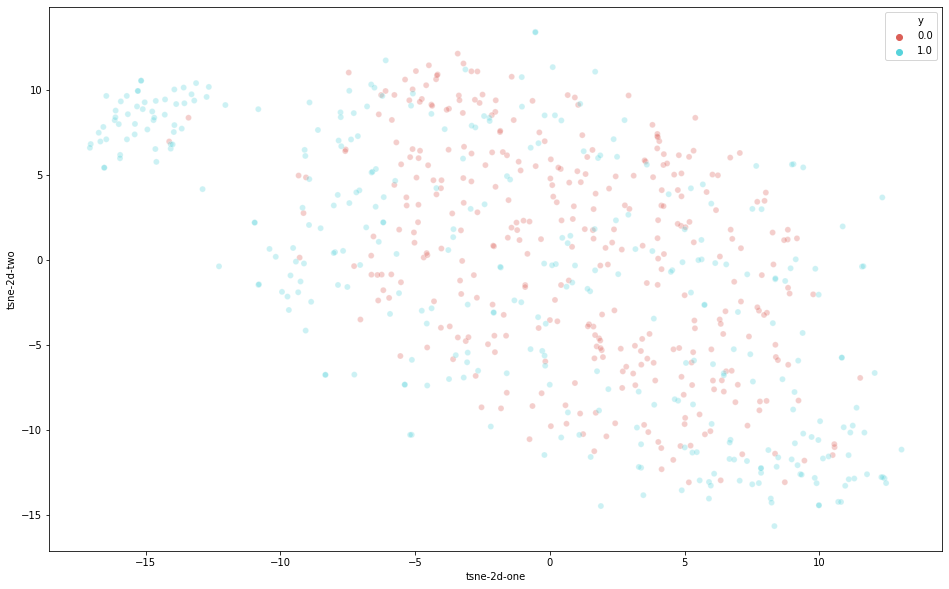

In [0]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [0]:
features[1]

NameError: ignored